In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler


/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv


1. customer_id
2. credit_score 
3. country, 
4. gender,
5. age,
6. tenure, Kullanım Süresi
7. balance, bankada bulunan parası
8. products_number,
9. credit_card,
10. active_member, 
11. estimated_salary, tahmini yıllık kazanç
12. churn, used as the target. 1 if the client has left the bank during some period or 0 if he/she has not.

In [3]:
#Dateset Okuma
df = pd.read_csv('/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv')

In [4]:
df2 = pd.read_csv('/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv')

In [5]:
df.head()


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [7]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.drop(['customer_id'],inplace = True,axis=1)

In [9]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


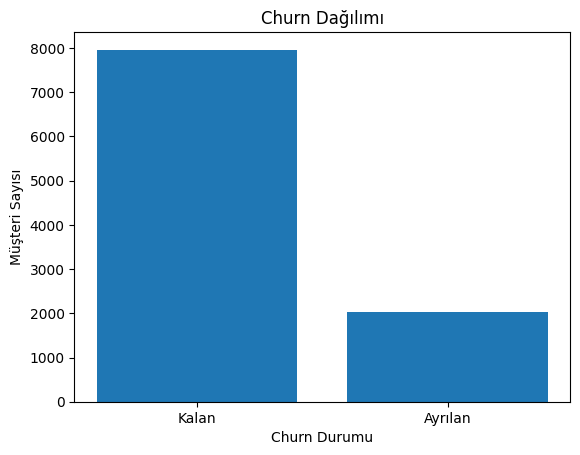

In [11]:
churn_counts = df['churn'].value_counts()

plt.bar(churn_counts.index, churn_counts.values)
plt.xticks(churn_counts.index, ['Kalan', 'Ayrılan'])
plt.xlabel('Churn Durumu')
plt.ylabel('Müşteri Sayısı')
plt.title('Churn Dağılımı')
plt.show()

## Kredi Scoruna Göre churn

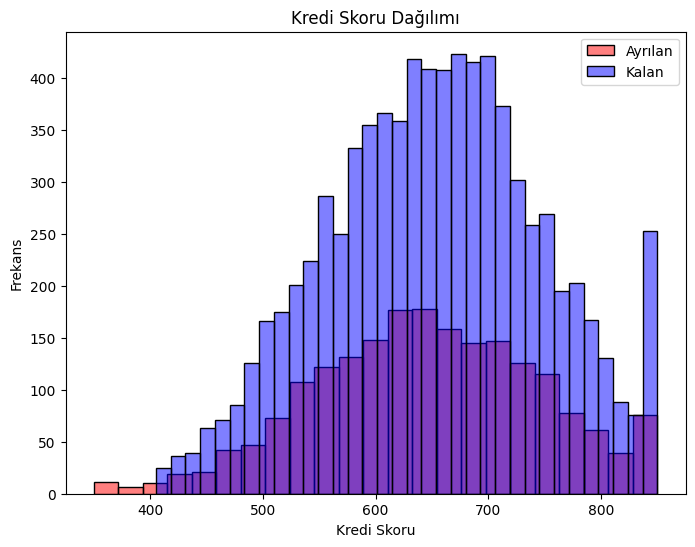

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(df[df['churn'] == 1]['credit_score'], color='red', label='Ayrılan', alpha=0.5)
sns.histplot(df[df['churn'] == 0]['credit_score'], color='blue', label='Kalan', alpha=0.5)

plt.xlabel('Kredi Skoru')
plt.ylabel('Frekans')
plt.title('Kredi Skoru Dağılımı')
plt.legend()
plt.show()
#Kredi Scoru Fazla Olanlar Bankaya Daha Bağımlı olmuş

## Müşteri Yaşlarına göre churn

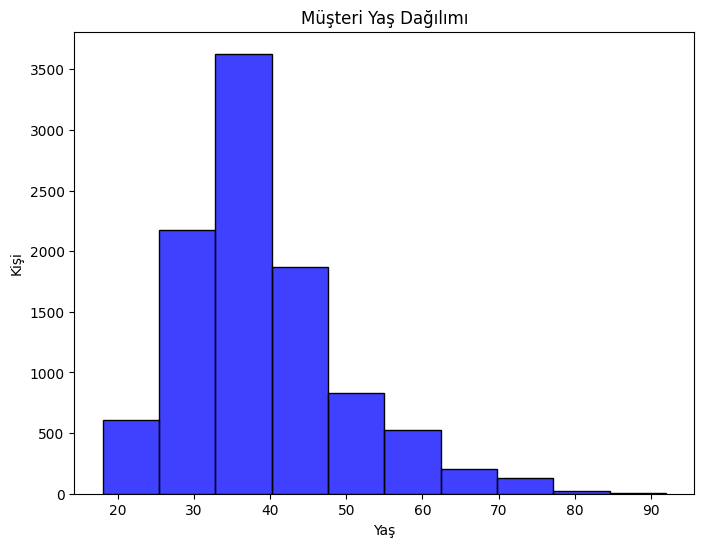

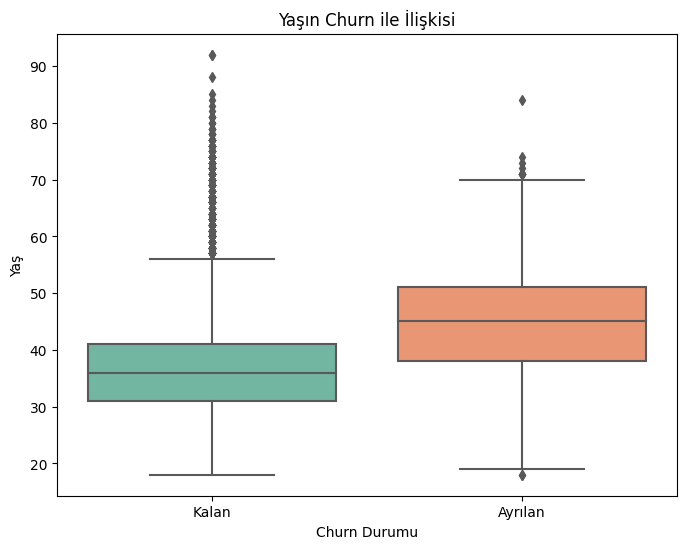

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], color='blue', bins=10)
plt.xlabel('Yaş')
plt.ylabel('Kişi')
plt.title('Müşteri Yaş Dağılımı')

plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='age', data=df, palette='Set2')
plt.xlabel('Churn Durumu')
plt.ylabel('Yaş')
plt.title('Yaşın Churn ile İlişkisi')
plt.xticks([0, 1], ['Kalan', 'Ayrılan'])

plt.show()

## Müşteri Hizmet Süresi (Tenure) Göre Churn

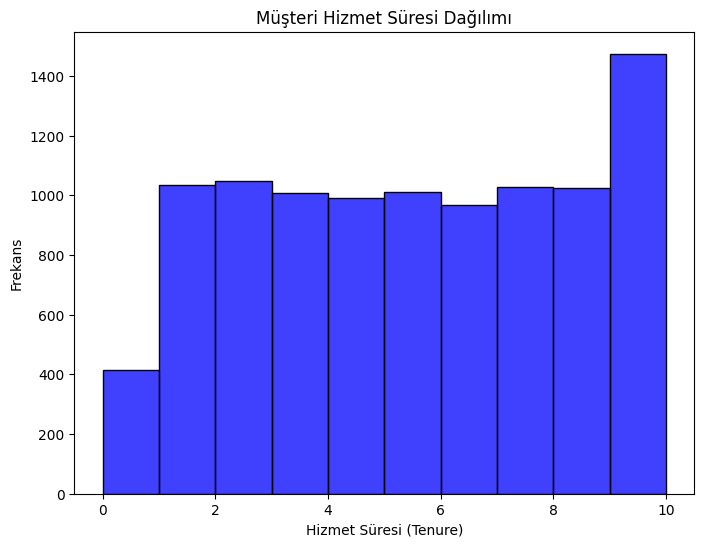

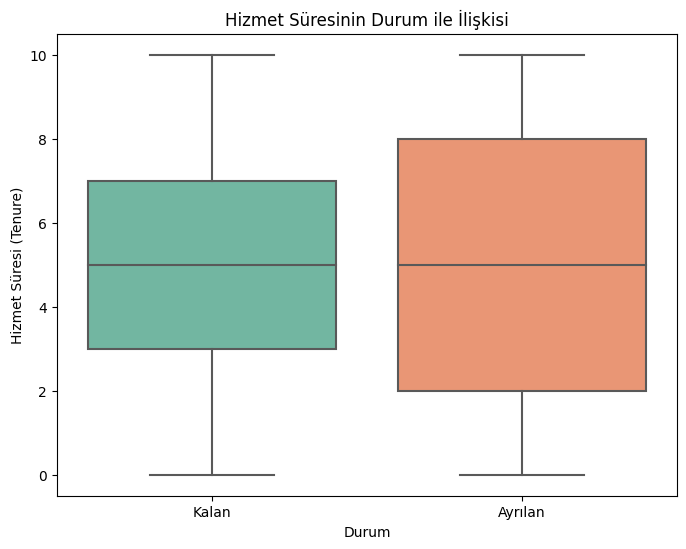

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(df['tenure'], color='blue', bins=10)
plt.xlabel('Hizmet Süresi (Tenure)')
plt.ylabel('Frekans')
plt.title('Müşteri Hizmet Süresi Dağılımı')

plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='tenure', data=df, palette='Set2')
plt.xlabel('Durum')
plt.ylabel('Hizmet Süresi (Tenure)')
plt.title('Hizmet Süresinin Durum ile İlişkisi')
plt.xticks([0, 1], ['Kalan', 'Ayrılan'])

plt.show()



## Müşteri Bütçe (Balance) Churn durumu

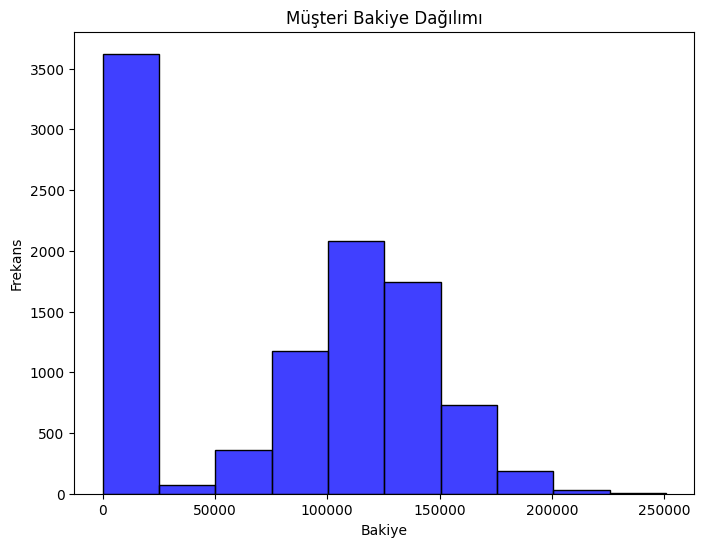

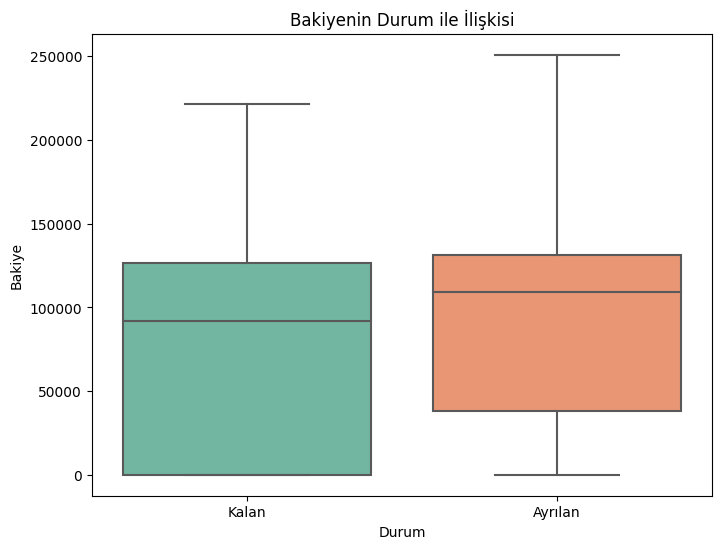

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(df['balance'], color='blue', bins=10)
plt.xlabel('Bakiye')
plt.ylabel('Frekans')
plt.title('Müşteri Bakiye Dağılımı')


plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='balance', data=df, palette='Set2')
plt.xlabel('Durum')
plt.ylabel('Bakiye')
plt.title('Bakiyenin Durum ile İlişkisi')
plt.xticks([0, 1], ['Kalan', 'Ayrılan'])  

plt.show()
#Genellikle Bütçesi Düşük Olanlar Bankada Kalmıştır

## Müşterinin Hangi Tür Ürün Kullanmasına Bağlı Churn

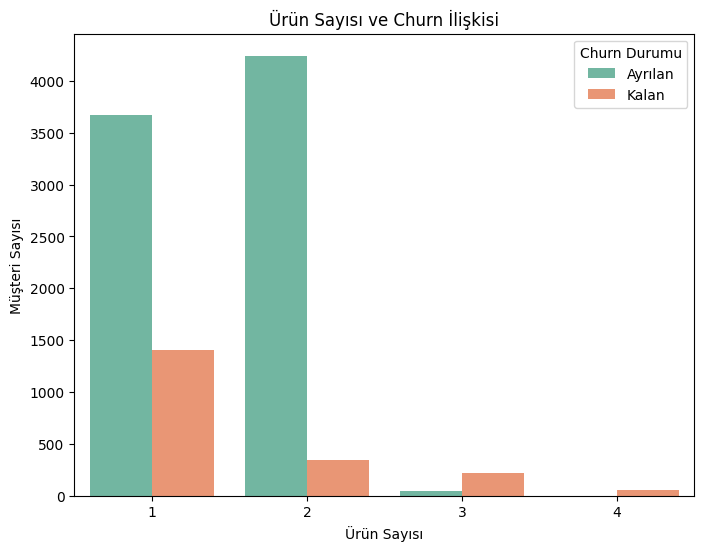

In [16]:
#Hangi Tür Ürün Kullanımına bağlı ayrılma durumu
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='products_number', hue='churn', palette='Set2')
plt.xlabel('Ürün Sayısı')
plt.ylabel('Müşteri Sayısı')
plt.title('Ürün Sayısı ve Churn İlişkisi')
plt.legend(title='Churn Durumu', labels=['Ayrılan', 'Kalan'])

plt.show()

## Kredi Kartı Sahipliği ve Churn İlişkisi

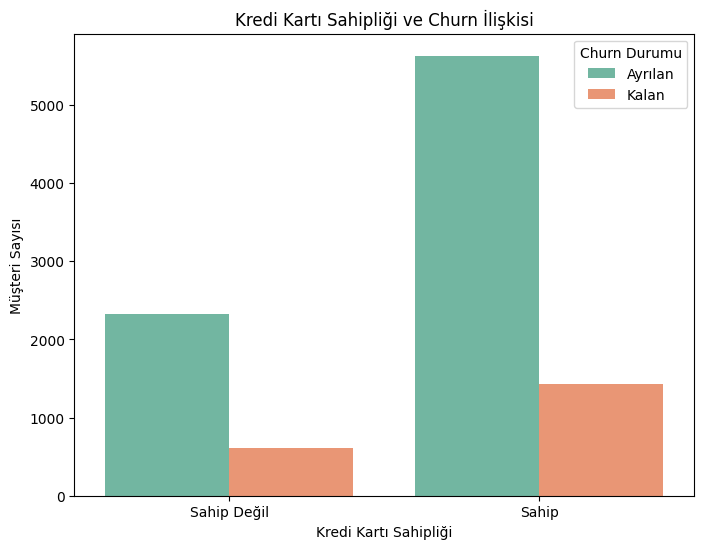

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='credit_card', hue='churn', palette='Set2')
plt.xlabel('Kredi Kartı Sahipliği')
plt.ylabel('Müşteri Sayısı')
plt.title('Kredi Kartı Sahipliği ve Churn İlişkisi')
plt.legend(title='Churn Durumu', labels=['Ayrılan', 'Kalan'])
plt.xticks([0, 1], ['Sahip Değil', 'Sahip']) 
plt.show()
#Kredi Kartı Sahibi olanalr bankaya bağlı kalmıştır

## Aktif ve Pasif Üye Churn Durumu

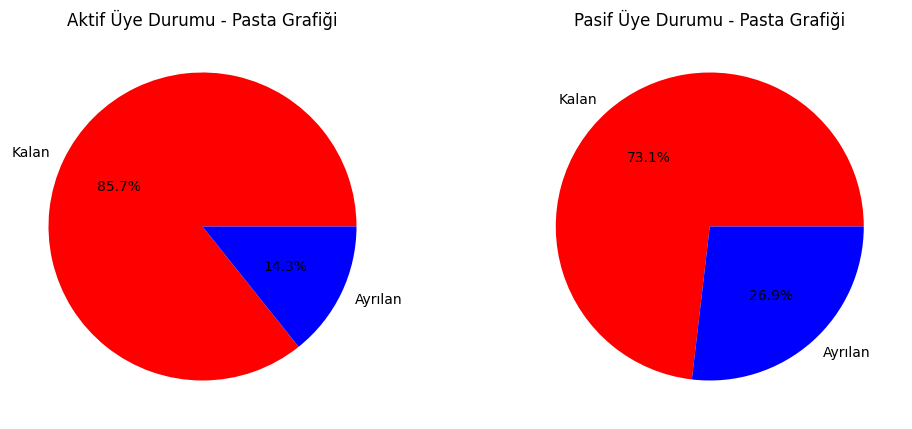

In [18]:
active_counts = df[df['active_member'] == 1]['churn'].value_counts()
passive_counts = df[df['active_member'] == 0]['churn'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].pie(active_counts, labels=['Kalan', 'Ayrılan'], autopct='%1.1f%%', colors=['red', 'blue'])
axes[0].set_title('Aktif Üye Durumu - Pasta Grafiği')

axes[1].pie(passive_counts, labels=['Kalan', 'Ayrılan'], autopct='%1.1f%%', colors=['red', 'blue'])
axes[1].set_title('Pasif Üye Durumu - Pasta Grafiği')

plt.show()
#Pasif olan müşterilerde daha çok ayrılma durumu olmuştur

## Tahmini Maaşın Churn ile İlişkisi

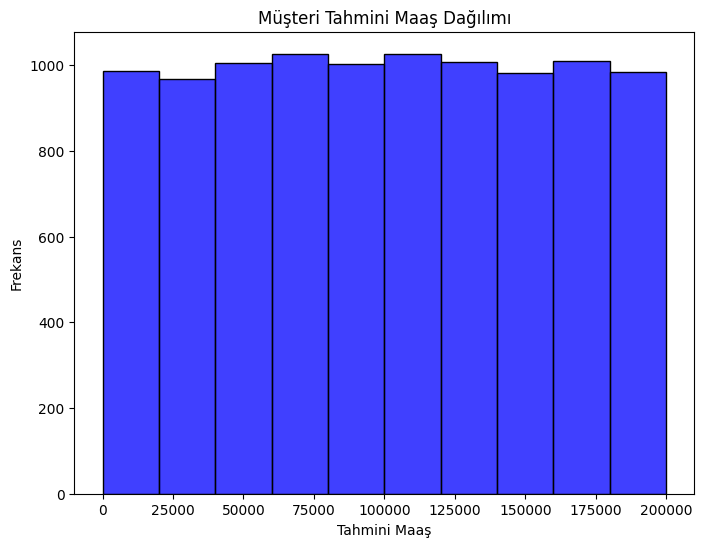

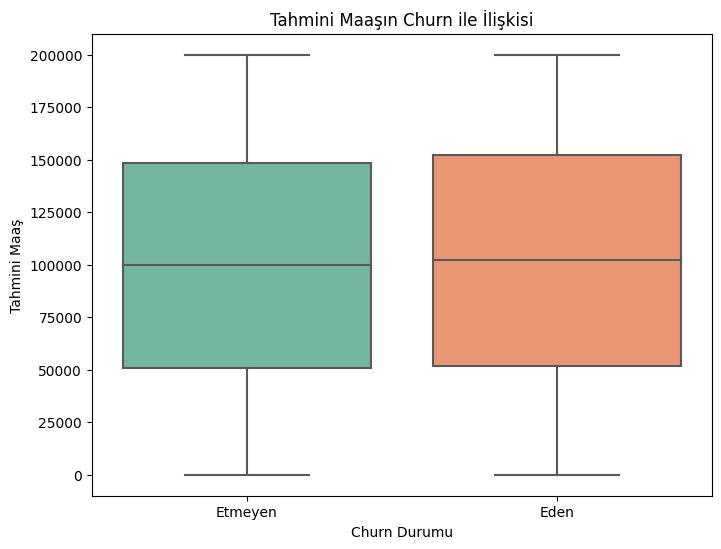

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(df['estimated_salary'], color='blue', bins=10)
plt.xlabel('Tahmini Maaş')
plt.ylabel('Frekans')
plt.title('Müşteri Tahmini Maaş Dağılımı')

plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='estimated_salary', data=df, palette='Set2')
plt.xlabel('Churn Durumu')
plt.ylabel('Tahmini Maaş')
plt.title('Tahmini Maaşın Churn ile İlişkisi')
plt.xticks([0, 1], ['Etmeyen', 'Eden'])

plt.show()
#Tahmini maaş churn ilşikisi pek açık değildir.

## Korelasyon Matrisi

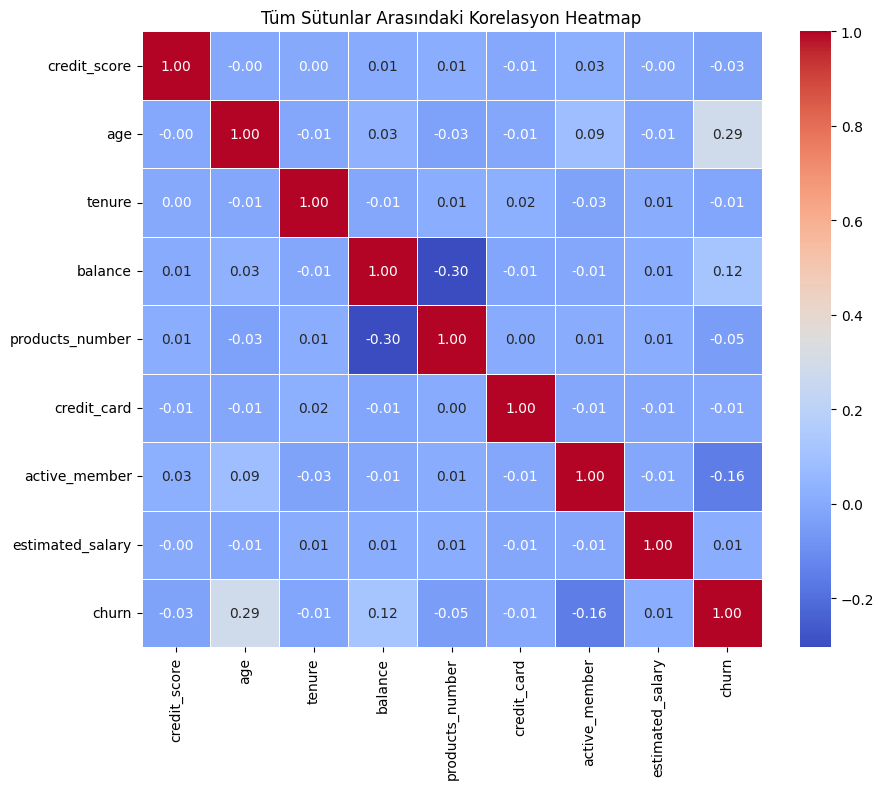

In [20]:
numerical_columns = df.select_dtypes(include='number')

correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Tüm Sütunlar Arasındaki Korelasyon Heatmap')
plt.show()

## Numeric Columnları Görselleştirme

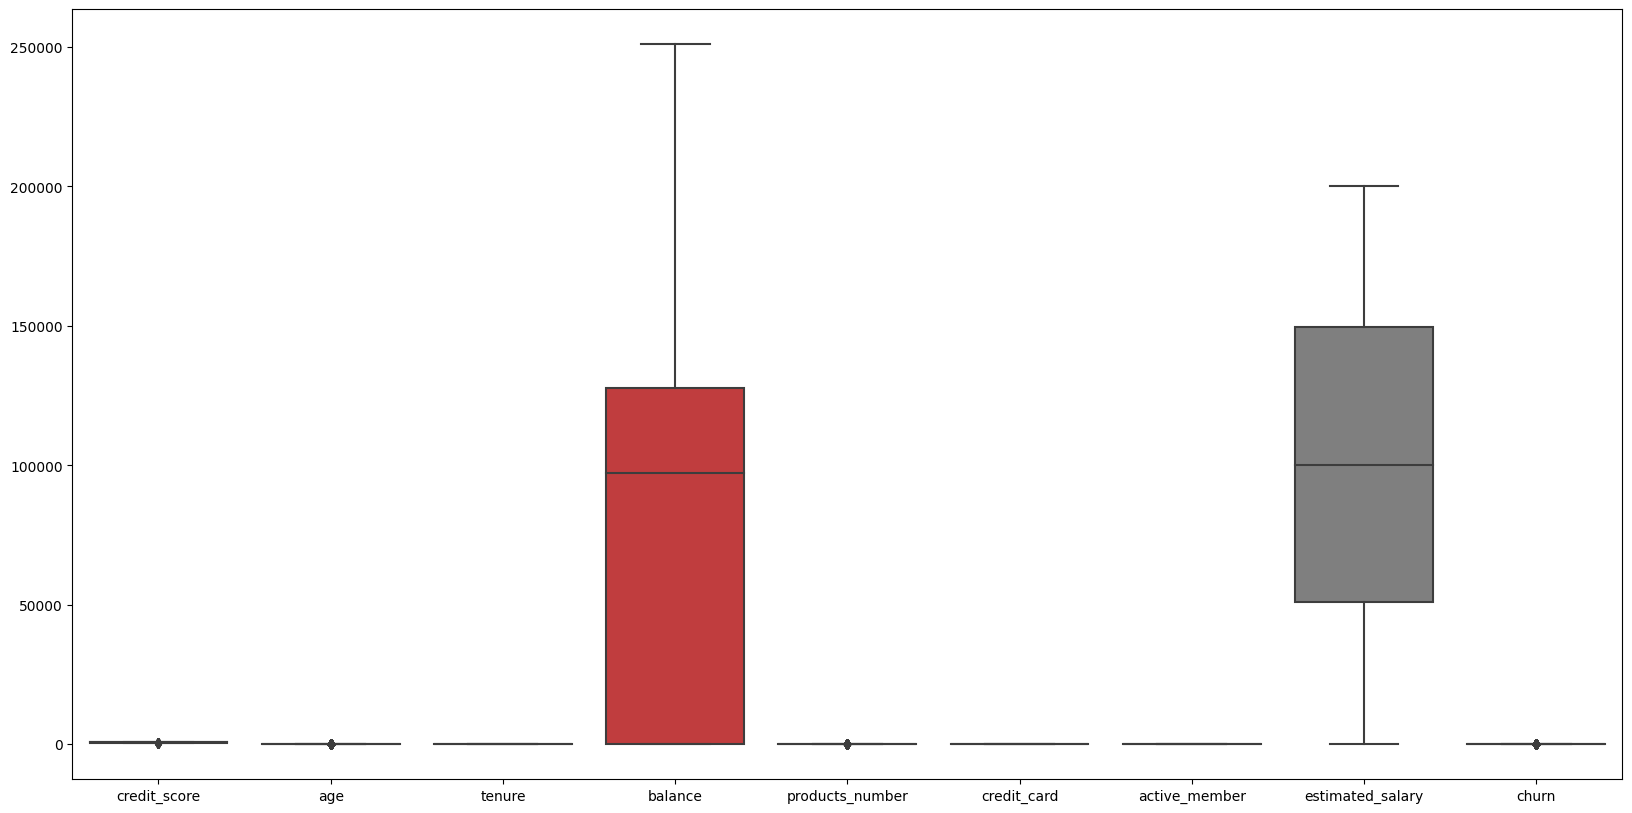

In [21]:
plt.figure(figsize=(20,10))
#num_cols.boxplot()
sns.boxplot(data=numerical_columns)
plt.show()

## Numeric Columnları Normalize Etme

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(numerical_columns), columns=numerical_columns.columns)

df[numerical_columns.columns] = df_normalized

df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,0.538,France,Female,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0
1,0.516,Spain,Female,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0
2,0.304,France,Female,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0
3,0.698,France,Female,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0
4,1.000,Spain,Female,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0


## Normalize Edilmiş Numeric Columnları Görselleştirme

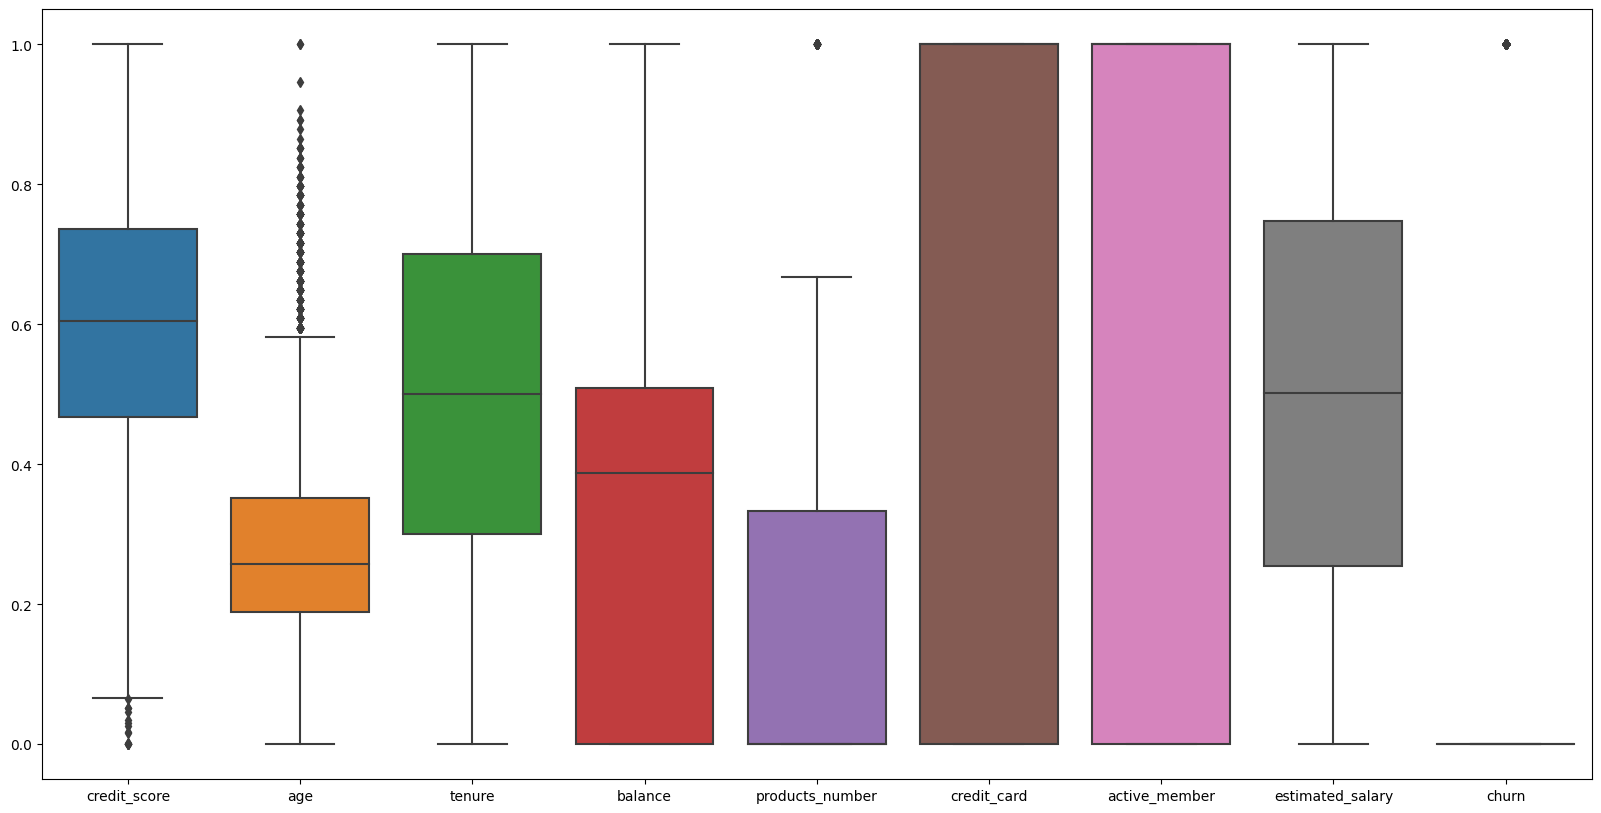

In [23]:
numerical_columns = df.select_dtypes(include='number')
plt.figure(figsize=(20,10))

sns.boxplot(data=numerical_columns)
plt.show()

## Outlierleri Kaldırma

In [24]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    30
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [25]:
 for i in numerical_columns.columns:
    lower_range,upper_range = remove_outlier(df[i])
    df[i] = np.where(df[i] > upper_range, upper_range, df[i])
    df[i] = np.where(df[i] < lower_range, lower_range, df[i])


## Outlier Remove İşleminden Sonra Görselleştirme

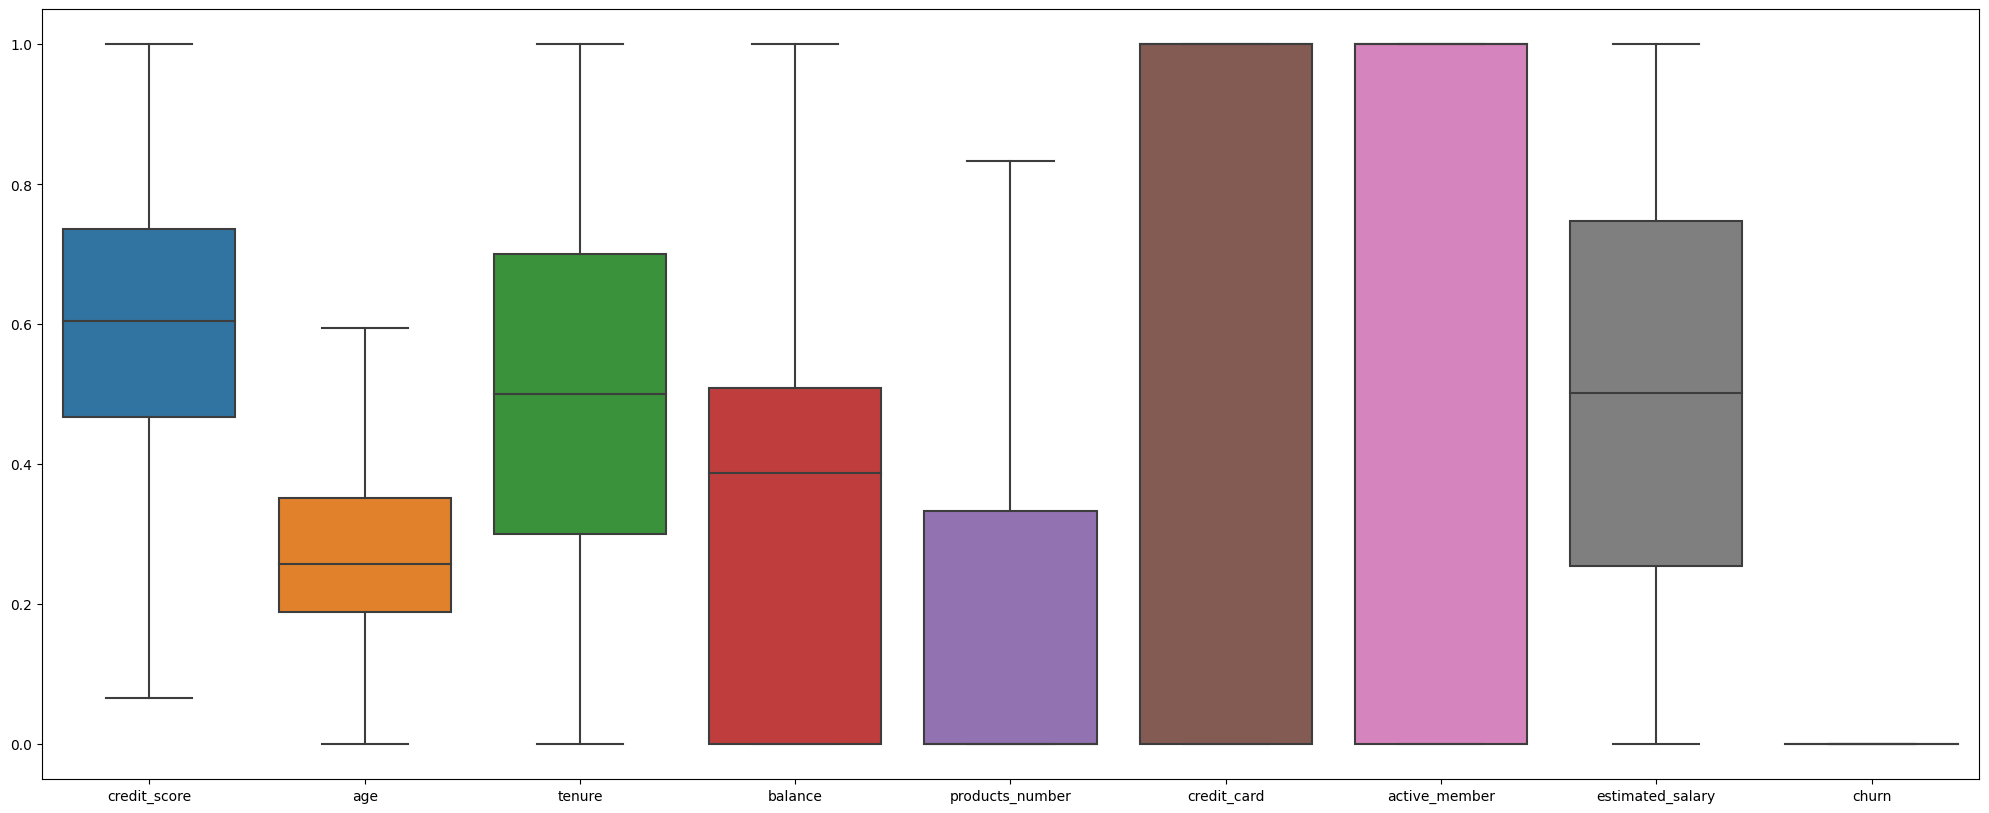

In [26]:
num_cols = df.select_dtypes(include='number')
plt.figure(figsize=(25,10))

sns.boxplot(data=num_cols)
plt.show()

# Başlangıç Seviye Sorular

Veri setinde toplam kaç Kişi bulunmaktadır? -1

In [27]:
df2.shape[0]

10000

Veri setinde erkek kadın dağılımı nedir? -2

In [28]:
df2['gender'].value_counts()

gender
Male      5457
Female    4543
Name: count, dtype: int64

Veri setinde en çok hangi ülkeden müşeteri var? -3

In [29]:
df2['country'].value_counts().idxmax()

'France'

Veri Setinde oratalama kredi skoru nedir? -4

In [30]:
df2.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [31]:
df2['credit_score'].mean()

650.5288

Veri Setinde oratalama bütçe (balance) nedir? -5

In [32]:
df2['balance'].mean()

76485.889288

Veri Setinde yüzde kaç müşteri aktif (active_member)dir?-6

In [33]:
aktif = df[df['active_member'] == 1]
toplam = len(df)
toplam_aktif = len(aktif)
yuzde = (toplam_aktif / toplam) * 100

yuzde

51.51

Veri Setinde oratalama tahmini maaş (estimated_salary) nedir? -7

In [34]:
df2['estimated_salary'].mean()

100090.239881

Veri Setinde kredi scoru 500'den fazla olan müşteri sayısı kaçtır?-8

In [35]:
df2[df2['credit_score'] > 500].shape[0]

9357

Veri Setinde Fransada en yüksek kredi scoru kaçtır? -9

In [36]:
fransiz = df2[df2['country'] == 'France']
fransiz['credit_score'].max()

850

Veri Setinde ortalama product_number kaçtır? -10

In [37]:
df2['products_number'].mean()

1.5302

# Orta Seviye Sorular

En yüksek ortlama kredi scoruna sahip ülke hangisidir? -1 

In [38]:
ortalama = df2.groupby('country')['credit_score'].mean()
ortalama.idxmax()

'Germany'

Erkeklerin mi kredi scoru daha yüksektir kadınların mı? -2

In [56]:
cinsiyet = df2.groupby('gender')['credit_score'].mean()


if cinsiyet['Male'] > cinsiyet['Female']:
    print("Erkeklerin Daha Yüksektir.",cinsiyet['Male'])
elif cinsiyet['Male'] < cinsiyet['Female']:
    print("Kadınların Daha Yüksektir.",cinsiyet['Female'])
else:
    print("Erkeklerin ve Kadınların Ortalama Kredi Skorları Eşittir.")

Kadınların Daha Yüksektir. 650.831388950033


En çok hangi ülkede ayrılma (churn) olmuştur?- 3

In [40]:
ulke_churn = df2[df2['churn'] == 1]['country'].value_counts()

ulke_churn.idxmax()

'Germany'

En yüksek ortalama kullanım süresi (Tenure) olan ülke hangisidir? -4

In [41]:
ortlama_tenure = df2.groupby('country')['tenure'].mean()

print('En yüksek ülke',ortlama_tenure.idxmax())

print ('Ortlama Tenure',ortlama_tenure.max())

En yüksek ülke Spain
Ortlama Tenure 5.03229713362939


Ortlama bütçesi (balance) 100k'dan fazla olan ülkeler hangileridir? -5

In [42]:
ortlama_balance = df2.groupby('country')['balance'].mean()

ortlama_balance[ortlama_balance > 100000]


country
Germany    119730.116134
Name: balance, dtype: float64

Yaşı 35 üstü ve Almanya vatandaşı olan kişilerin ortalama kredi scoru kaçtır? -6

In [43]:
yetiskin_alman = df2[(df2['country'] == 'Germany') & (df2['age'] > 35)]
yetiskin_alman['credit_score'].mean()

649.6805377720871

Kullanım Süresi (Tenure) 2 yıldan fazla olanlarda Ayrılma (Churn) nasıldır? -7

In [44]:
kullanim_suresi = df2[df2['tenure'] > 2]

ayrilan_musteri = kullanim_suresi['churn'].sum()

toplam_sure_uzunlugu = len(kullanim_suresi)

ayrilma_orani = (ayrilan_musteri / toplam_sure_uzunlugu) * 100

print("Kullanım Süresi 2 Yıldan Fazla Olan Müşterilerde Ayrılma Durumu:")
print("Toplam Müşteri Sayısı:", toplam_sure_uzunlugu)
print("Ayrılan Müşteri Sayısı:", ayrilan_musteri)
print("Ayrılma Oranı (%):", ayrilma_orani)

Kullanım Süresi 2 Yıldan Fazla Olan Müşterilerde Ayrılma Durumu:
Toplam Müşteri Sayısı: 7504
Ayrılan Müşteri Sayısı: 1509
Ayrılma Oranı (%): 20.109275053304902


Ispanyada (Spain) ülkesinde ortlama Kullanım Süresi (Tenure) kaç yıldır? -8

In [45]:
ispanyol = df2[df2['country'] == 'Spain']


ispanyol['tenure'].mean()

5.03229713362939

Churn erkeklerde mi daha fazladır kadınlarda mı? -9

In [46]:
cinsiyet_churn = df2.groupby('gender')['churn'].sum()

churn_erkek = cinsiyet_churn['Male']
churn_kadin = cinsiyet_churn['Female']

if churn_erkek > churn_kadin:
    print("Churn Erkeklerde Daha Fazla")
elif churn_erkek < churn_kadin:
    print("Churn Kadınlarda Daha Fazla")
else:
    print("Erkekler ve Kadınlar Arasında Churn Sayısı Eşittir")
print(churn_kadin/churn_erkek)    

Churn Kadınlarda Daha Fazla
1.2683741648106903


Kredi Scoru 800 den fazla ve yıllık kazancı 100k'den fazla olan ispanyalı kişi sayısı kaçtır? -10

In [47]:
ispanyol = df2[df2['country'] == 'Spain']

# Kredi skoru 800'den fazla ve yıllık kazancı 100,000'den fazla olan müşterileri filtreleyin
ispanyol_kredi_scoru= ispanyol[(ispanyol['credit_score'] > 800) & (ispanyol['estimated_salary'] > 100000)]

ispanyol_kredi_scoru.shape[0]


68

# Machine Learning

In [48]:
from sklearn.preprocessing import LabelEncoder
label_encoder_country = LabelEncoder()
label_encoder_gender = LabelEncoder()

df['country_encoded'] = label_encoder_country.fit_transform(df['country'])
df['gender_encoded'] = label_encoder_gender.fit_transform(df['gender'])

In [49]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_encoded,gender_encoded
0,0.538,France,Female,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,0.0,0,0
1,0.516,Spain,Female,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,2,0
2,0.304,France,Female,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,0.0,0,0
3,0.698,France,Female,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,0,0
4,1.000,Spain,Female,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,2,0


In [50]:
X = numerical_columns.drop('churn', axis=1)  
y = numerical_columns['churn']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
for k in range(1, 20):    
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"K={k}, Doğruluk (Accuracy): {accuracy}")

K=1, Doğruluk (Accuracy): 0.8
K=2, Doğruluk (Accuracy): 0.765
K=3, Doğruluk (Accuracy): 0.79
K=4, Doğruluk (Accuracy): 0.795
K=5, Doğruluk (Accuracy): 0.8
K=6, Doğruluk (Accuracy): 0.81
K=7, Doğruluk (Accuracy): 0.815
K=8, Doğruluk (Accuracy): 0.82
K=9, Doğruluk (Accuracy): 0.845
K=10, Doğruluk (Accuracy): 0.835
K=11, Doğruluk (Accuracy): 0.83
K=12, Doğruluk (Accuracy): 0.805
K=13, Doğruluk (Accuracy): 0.82
K=14, Doğruluk (Accuracy): 0.82
K=15, Doğruluk (Accuracy): 0.835
K=16, Doğruluk (Accuracy): 0.825
K=17, Doğruluk (Accuracy): 0.835
K=18, Doğruluk (Accuracy): 0.845
K=19, Doğruluk (Accuracy): 0.83


In [60]:
decision_tree_classifier = DecisionTreeClassifier(random_state=42)  

decision_tree_classifier.fit(X_train, y_train)

y_pred = decision_tree_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Decision Tree Doğruluk (Accuracy):", accuracy)

Decision Tree Doğruluk (Accuracy): 0.84


In [59]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree_classifier = DecisionTreeClassifier(random_state=42)

decision_tree_classifier.fit(X_train, y_train)

y_pred = decision_tree_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Decision Tree Doğruluk (Accuracy):", accuracy)

Decision Tree Doğruluk (Accuracy): 0.84


In [58]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import random

# Sentetik veri seti oluşturun
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Veriyi eğitim ve test kümelerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree sınıflandırma modelini oluşturun
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

# Modeli eğitin
decision_tree_classifier.fit(X_train, y_train)

# Sentetik veri setini oluşturun
synthetic_data = []

for _ in range(10):
    # Rastgele sentetik veri oluşturun
    synthetic_sample = [random.uniform(-3, 3) for _ in range(10)]
    synthetic_data.append(synthetic_sample)

# Modeli kullanarak tahminler yapın
predictions = decision_tree_classifier.predict(synthetic_data)

# Tahminleri ve gerçek değerleri bir tablo şeklinde gösterin
result_table = pd.DataFrame({'Prediction': predictions, 'Real Value': y_test[:10]})

# True/False değerlerini hesaplayın
result_table['True/False'] = result_table['Prediction'] == result_table['Real Value']

# Başarı metriklerini hesaplayın
accuracy = accuracy_score(result_table['Real Value'], result_table['Prediction'])

# Sonuçları yazdırın
print("Sonuçlar:")
print(result_table)
print("\nAccuracy:", accuracy)

Sonuçlar:
   Prediction  Real Value  True/False
0           1           0       False
1           1           1        True
2           1           1        True
3           1           1        True
4           0           0        True
5           0           1       False
6           1           0       False
7           1           0       False
8           1           0       False
9           0           0        True

Accuracy: 0.5
